# LAB 2 - eigen faces

**objectives:**

* implement face recognition using eigen faces

**help:**

* Eigen faces (Wikipedia) : [Eigen faces](http://en.wikipedia.org/wiki/Eigenface)


## Direct approach

1. import all the images are contained into [faces_tp_info_h_501.zip](http://homepages.ulb.ac.be/~odebeir/data/faces_tp_info_h_501.zip)
2. write a program that read images and subsample them (e.g. by 5)
3. convert 2D image into lines, collect all these lines into one single matrix
4. normalize the matrix T by removing mean image
5. compute the variance/covariance matrix
$$ \mathbf{S} = \mathbf{T^TT}$$
6. compute the eigen values of the matrix
$$\mathbf{Sv}_i = \mathbf{T^T}\mathbf{Tv}_i = \lambda_i \mathbf{v}_i$$

In [4]:
#exemple of eigen value extraction
import numpy as np
from numpy import linalg as LA
w,v = LA.eig(np.diag((1, 2, 3)))
print w;v

[ 1.  2.  3.]


array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

## Compression
1. construct images using only the first N eigen faces (e.g. N=20)
2. compare (visually) reconstructed images with original images

## Indirect approach
1. for the indirect approach compute the eigen values of $S$ such that:
$$\mathbf{Sv}_i = \mathbf{T^T}\mathbf{Tv}_i = \lambda_i \mathbf{v}_i$$

first compute the eigen value for $\mathbf{TT^T}$

$$\mathbf{TT^T}\mathbf{u}_i = \lambda_i \mathbf{u}_i$$

$$\mathbf{T^T}\mathbf{TT}^T\mathbf{u}_i = \lambda_i\mathbf{T^T}\mathbf{u}_i$$

$$\mathbf{v}_i = \mathbf{T^T} \mathbf{u}_i$$

if $u$ are eigenvectors of $TT’$ then $v$ are eigenvectors of $S$.

2. reconstruct images using only the first N eigen faces (e.g. N=20)
3. compare (visually) reconstructed images with original images
4. use the indirect approach with more resolution

## Face recognition
1. using the simplified vector space (e.g. 20 first eigen faces), compute the distance between one face and the others using euclidian distance

2. for a subset of the image of the database find the 4 closest match

In [14]:
%pylab inline
import os
from skimage.io import imread
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


[[ 39  23  26 ...,  57  60  61]
 [ 36  34  30 ...,  40  46  51]
 [ 33  28  29 ..., 251 252 252]
 ..., 
 [ 32  58  78 ..., 242 239 244]
 [ 42  57  55 ..., 245 248 247]
 [ 57  64  80 ...,  43  26  18]]
(1609, 2150)
#of pixels: 2150


<matplotlib.colorbar.Colorbar instance at 0x7fd9b1495b90>

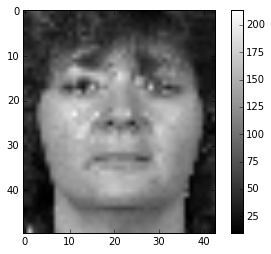

In [46]:
path='./normal/'
d = os.listdir(path)
X = []
for f in d:
    f_path = os.path.join(path,f)
    if f_path.endswith('.tif'):
        ima = imread(f_path)
        if ima.ndim==3: #skip these ones
            continue
        # reshape image
        sub = 4
        s = ima[::sub,::sub]
        x = s.flatten()
        X.append(x)
        
X = np.asarray(X)
print X
print X.shape
print '#of pixels:',s.size
plt.imshow(s,cmap=plt.cm.gray)
plt.colorbar()
        
